C:\Users\adity\AppData\Local\Temp\ipykernel_24748\3321347995.py:93: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Parch', y='Survived', ci=None, data=df, ax=ax2)


Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


<Axes: xlabel='Pclass', ylabel='Percentage'>

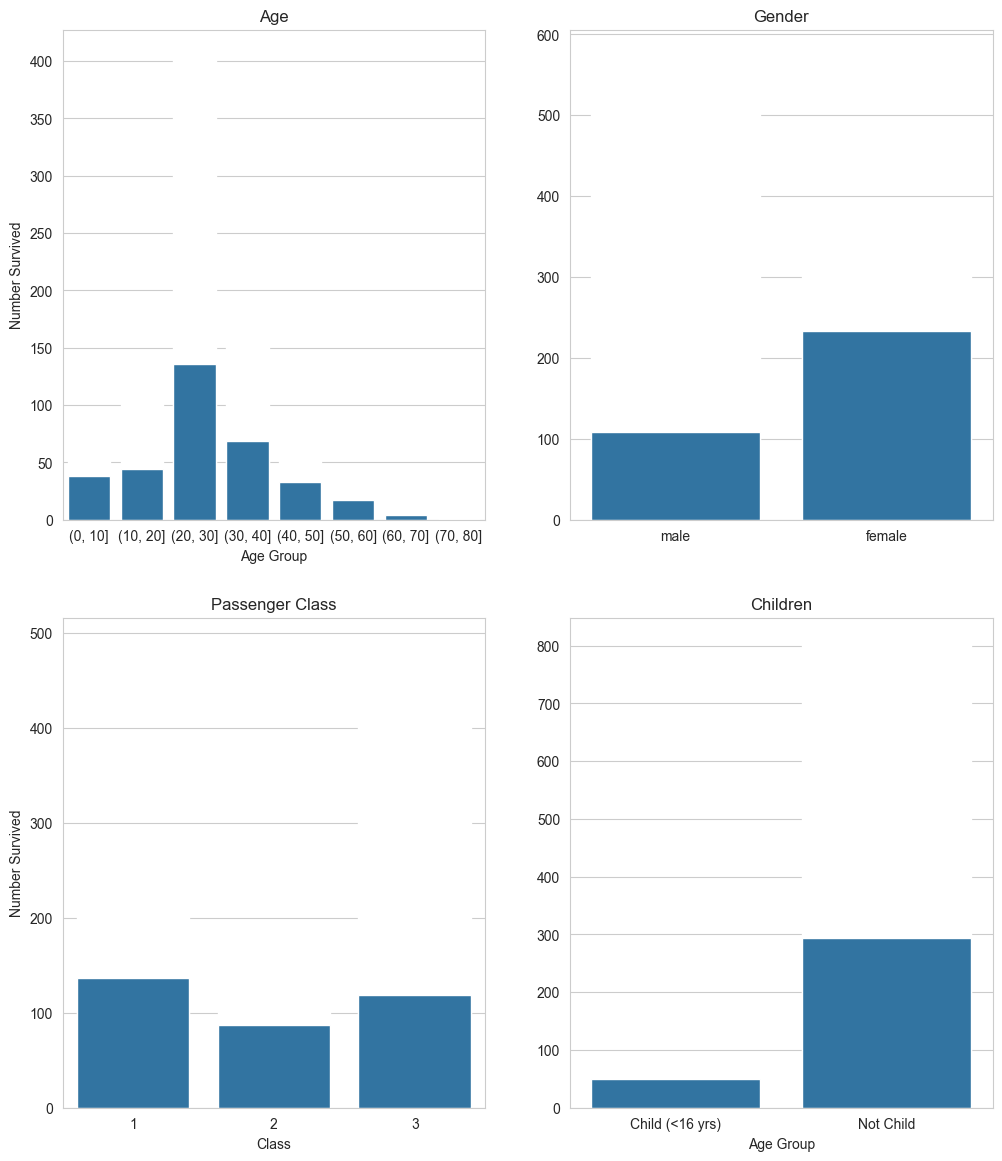

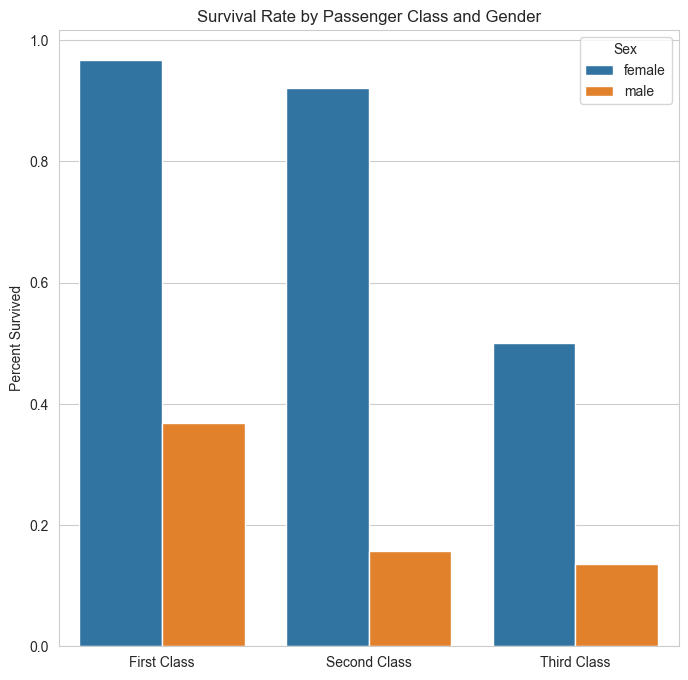

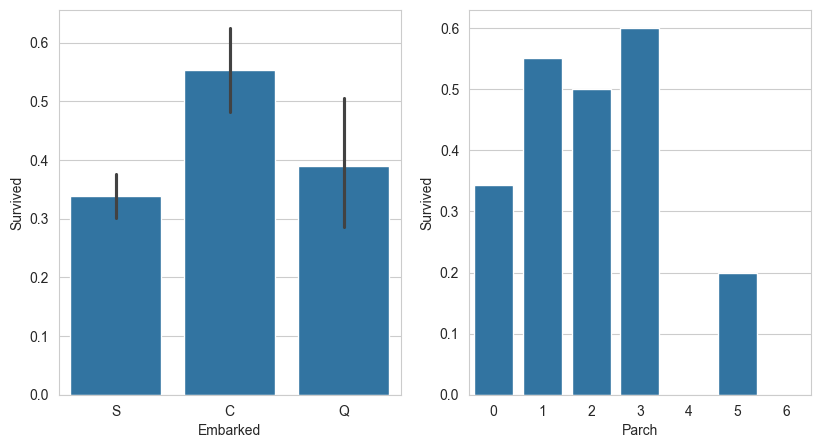

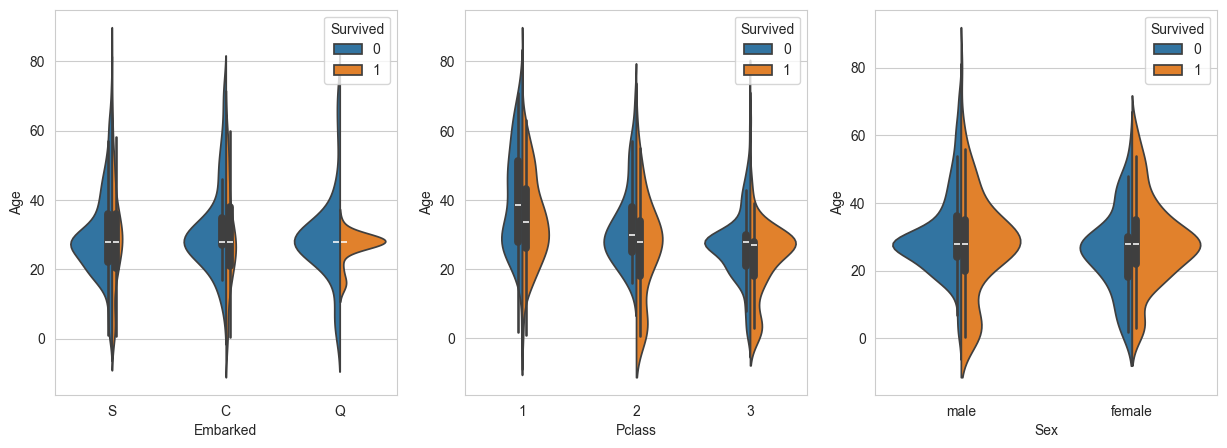

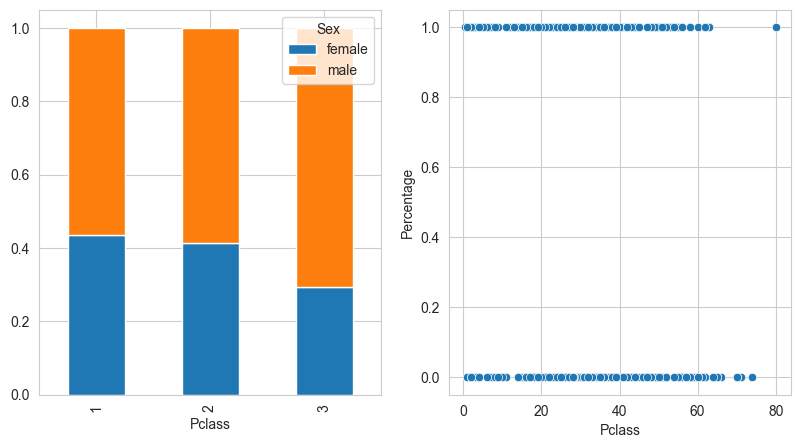

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


#df = pd.read_csv('../Data/titanic.csv')
# open the file and convert age to float
with open('../Data/titanic.csv') as f:
    df = pd.read_csv(f, dtype={'Age': np.float64})


#filling in Embarked and Age columns
df['Embarked'] = df.Embarked.fillna('S')
df['Age'] = df.Age.fillna(df.Age.median())

#creting bins for age

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_binned'] = pd.cut(df.Age, bins, right=True, include_lowest=False)

# creating child variable
df['Child'] = (df.Age < 16).astype(int)
surv = df[df.Survived == 1]

fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(12,14))
sns.set_style('dark')


##### Count Plots
#first graph Age
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
         '(60, 70]', '(70, 80]']

sns.countplot(x='age_binned', color='white', ax=ax1, data=df, order=order)
sns.countplot(x='age_binned', ax=ax1, data=surv, order=order)
plt.xlabel('Age Group')
plt.ylabel('Total / Survived')
ax1.set_title('Age')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number Survived')


# draw second graph gender
sns.set_style('dark')
sns.countplot(x='Sex', color='white', ax=ax2, data=df, order=['male','female'])
sns.countplot(x='Sex', ax=ax2, data=surv,  order=['male','female'])
plt.ylabel('Survived')
ax2.set_xlabel('')
ax2.set_title('Gender')
ax2.set_ylabel('')

# draw third Passenger Class
sns.countplot(x='Pclass', color='white', ax=ax3, data=df,  order=[1, 2, 3])
sns.countplot(x='Pclass', ax=ax3, data=surv,  order=[1, 2, 3])
ax3.set_title('Passenger Class')
ax3.set_ylabel('Number Survived')
ax3.set_xlabel('Class')

#draw 

sns.countplot(x='Child', color='white', ax=ax4, data=df, order=[1,0])
sns.countplot(x='Child', ax=ax4, data=surv, order=[1,0])
loc, labels = plt.xticks()
plt.xticks(loc,['Child (<16 yrs)','Not Child'])
plt.ylabel('Survived')
ax4.set_title('Children')
ax4.set_ylabel('')

#########  Bar plot

sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(8,8))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ax=axis, errorbar=None)
axis.set_title('Survival Rate by Passenger Class and Gender')
loc, labels = plt.xticks()
plt.xticks(loc, ['First Class','Second Class', 'Third Class'])
axis.set_ylabel('Percent Survived')
axis.set_xlabel('')

##############################################################################

fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(131)
ax2 = fig1.add_subplot(132)


df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=df, ax=ax1)

df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()
sns.barplot(x='Parch', y='Survived', ci=None, data=df, ax=ax2) 

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax3)


#### bar plot stacked

fig2 = plt.figure(figsize=(15,5))
ax11 = fig2.add_subplot(131)
ax21 = fig2.add_subplot(132)

tab = pd.crosstab(df['Pclass'], df['Sex'])
print (tab)


tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax11)

## scatter plot
plt.xlabel('Age')
plt.ylabel('Ser')

sns.scatterplot(x="Age",
                    y="Survived",
                    data=df, ax=ax21)

